<h1>Python packages to import that we will need</h1>

In [1438]:
import numpy as np                           # array manipulations
import matplotlib.pyplot as plt              # visualisation of data
from astropy.coordinates import SkyCoord     # coordinate transformations
import pandas as pd                          # I/O of data in table format
from astroquery.jplhorizons import Horizons  # python interface to HORIZONS
#plt.style.use('thomas')                      # my own plot style configuration file

<h2>numpy and plotting basics</h2>

In [1439]:
# creating an array from 0 to 9
x = np.arange(10)

<h3>array indices start at zero in python:</h3>

In [1440]:
x[0]

0

<h3>array index ranges go from first index to second-to-last:</h3>

In [1441]:
x[0:3] # last index is not included!

array([0, 1, 2])

In [1442]:
x[3:7]

array([3, 4, 5, 6])

<h3>arrays are used in a vectorised way; this avoids for-loops:</h3>

In [1443]:
y = x+10

In [1444]:
y

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [1445]:
y2 = -3*(x-5)**2 - 4

In [1446]:
y2

array([-79, -52, -31, -16,  -7,  -4,  -7, -16, -31, -52])

<h3>python functions as defined by a def statement:

In [1447]:
def func(x,a,b,c):
    return a + b*x + c*x**2 

In [1448]:
y3 = func(x,1,2,3)

In [1449]:
y3

array([  1,   6,  17,  34,  57,  86, 121, 162, 209, 262])

<h3>the same function but with an array of parameters:</h3>

In [1450]:
def func_vec(x,p):
    return p[0] + p[1]*x + p[2]*x**2

In [1451]:
y4 = func_vec(x,[1,2,3])

In [1452]:
y4-y3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h3>There is a difference between arrays, vectors, and lists in python;<br>
    lists are collections of numbers, strings, objects, arrays, others lists, ..., e.g.:</h3>

In [1453]:
b = [1,'y6',np.linspace(0,1,5),['a','b']]

<h3>b[0] is an iteger<br>
    b[1] is a string<br>
    b[2] is a whole numpy array<br>
    b[3] is another list, containing two strings<br></h3>

In [1454]:
b[2]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [1455]:
b[3][0]

'a'

<h3>another important object in python are dictionaries;<br>
    these contain identifiers (class names) which are then including some kind of information (data):</h3>

In [1456]:
diary = {'name':['first','second','third'],
        'age':np.array([45,23,-67]),
        'coordinates':np.array([[1,2],[3,4],[5,np.pi]])}

In [1457]:
diary['name']

['first', 'second', 'third']

In [1458]:
diary['age'][1]

23

In [1459]:
diary['coordinates'][2]

array([5.        , 3.14159265])

<h3>Let's plot our arrays in an x/y plot:</h3>

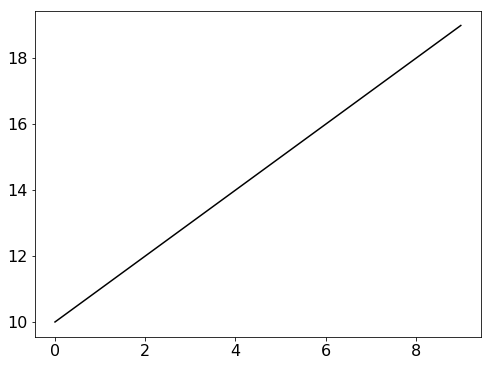

In [1460]:
# basic
plt.plot(x,y)

Text(0, 0.5, 'y')

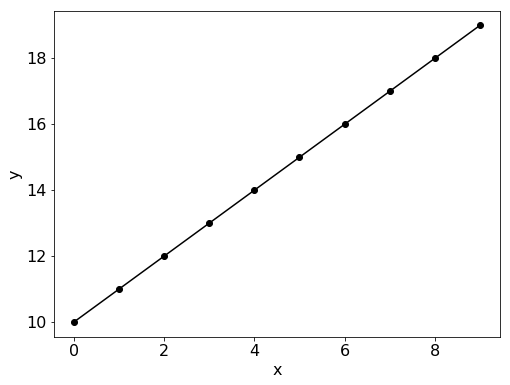

In [1461]:
# with more information, just add lines:
plt.plot(x,y,
         color='black',marker='o',linestyle='-')
plt.xlabel('x')
plt.ylabel('y')

<h3>overplotting: just add more plotting commands; here, the lines get names (labels):</h3>

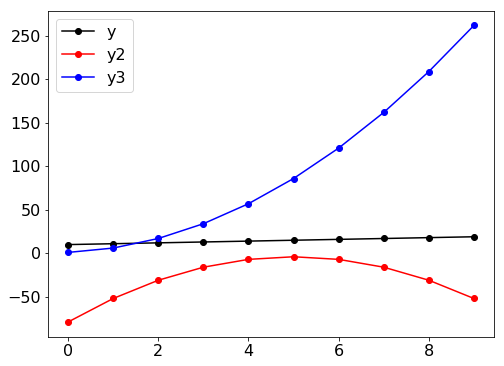

In [1462]:
plt.plot(x,y,'ko-',label='y')
plt.plot(x,y2,'ro-',label='y2')
plt.plot(x,y3,'bo-',label='y3')
plt.legend()

<h3>to save a figure as pdf, for example, use savefig():</h3>

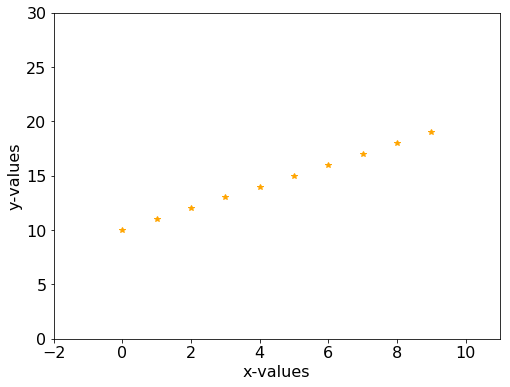

In [1463]:
plt.plot(x,y,'*',color='orange')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.xlim(-2,11)
plt.ylim(0,30)
plt.savefig('test_fig.pdf')

<h3>a file test_fig.pdf should have been created in the the same directory</h3>

<h2>now coordinates, transformation, and access to HORIZONS</h2>

<h3>we start from a coordinate pair Galactic longitude = 0 deg, Galactic latitude = 0 deg; (l,b) = (0,0):</h3>

In [1464]:
l,b = 0,0

In [1465]:
coords = SkyCoord(l,b,
                  unit='deg',
                  frame='galactic')

<h3>we created an object containing the information we gave it; now we can play around and do transformations, etc.:</h3>

In [1466]:
# conversion to ICRS (RA/DEC)
coords.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (266.40498829, -28.93617776)>

In [1467]:
# accessing the information:
ra,dec = coords.icrs.ra.value,coords.icrs.dec.value

In [1468]:
ra,dec

(266.4049882865447, -28.936177761791473)

<h3>a "circle" in ra/dec, transformed to gl/gb:</h3>

In [1469]:
ra_arr = np.arange(0,360,1)
dec_arr = np.repeat(0.,360)

In [1470]:
new_coords = SkyCoord(ra_arr,dec_arr,unit='deg',frame='icrs')

In [1471]:
new_gl,new_gb = new_coords.galactic.l.value,new_coords.galactic.b.value
# the next step is to transform from [0,360] to [-180,180], i.e. 0,0 is in the centre
new_gl[new_gl > 180] -= 360
# try to figure out what this one line is doing

<h3>plot in mercator projection:</h3>

(-180, 180)

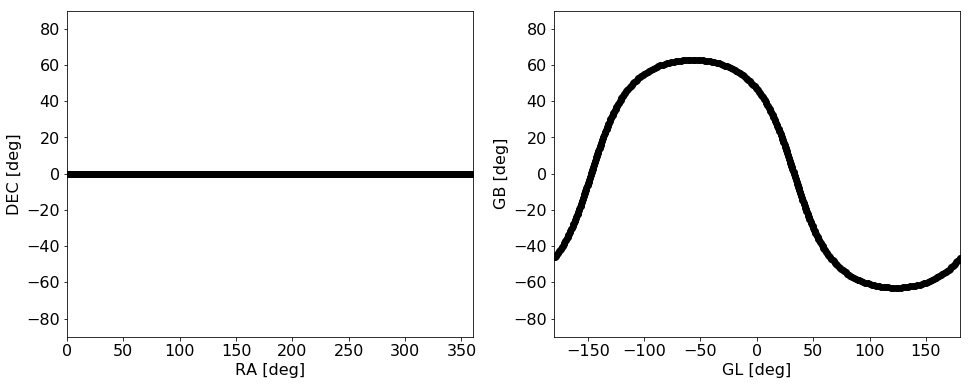

In [1472]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(ra_arr,dec_arr,'ko')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.ylim(-90,90)
plt.xlim(0,360)

plt.subplot(122)
plt.plot(new_gl,new_gb,'ko')
plt.xlabel('GL [deg]')
plt.ylabel('GB [deg]')
plt.ylim(-90,90)
plt.xlim(-180,180)

<h3>as expected?</h3>

<h3>access to JPL HORIZONS through the python interface astroquery<br>
    (instead of downloading all the data from the page, re-format the output file, and read it in to python):</h3>

In [1473]:
obj = Horizons(id='301',id_type='majorbody', # the Moon
               location='500',               # Earth centre
               epochs={'start':'2020-10-03', # dictionary that includes the times we want
                       'stop':'2020-11-03',  # NB: exactly the same as I used for my example
                       'step':'24h'})

In [1474]:
print(obj)

JPLHorizons instance "301"; location=500, epochs={'start': '2020-10-03', 'stop': '2020-11-03', 'step': '24h'}, id_type=majorbody


<h3>here calculate the ephemerides of the Moon:</h3>

In [1475]:
moon_eph = obj.ephemerides()

In [1476]:
print(moon_eph)

targetname    datetime_str   datetime_jd ... alpha_true  PABLon   PABLat
   ---            ---             d      ...    deg       deg      deg  
---------- ----------------- ----------- ... ---------- -------- -------
Moon (301) 2020-Oct-03 00:00   2459125.5 ...    12.9502  16.0844 -2.1988
Moon (301) 2020-Oct-04 00:00   2459126.5 ...    23.3305  22.5102 -1.9217
Moon (301) 2020-Oct-05 00:00   2459127.5 ...    33.9723  28.9276  -1.566
Moon (301) 2020-Oct-06 00:00   2459128.5 ...    44.7294  35.3565 -1.1316
Moon (301) 2020-Oct-07 00:00   2459129.5 ...    55.6101  41.8217 -0.6166
Moon (301) 2020-Oct-08 00:00   2459130.5 ...    66.6604   48.353 -0.0155
Moon (301) 2020-Oct-09 00:00   2459131.5 ...    77.9429  54.9841  0.6822
Moon (301) 2020-Oct-10 00:00   2459132.5 ...    89.5278  61.7513  1.4952
Moon (301) 2020-Oct-11 00:00   2459133.5 ...   101.4846  68.6898  2.4568
Moon (301) 2020-Oct-12 00:00   2459134.5 ...   113.8717  75.8291  3.6298
       ...               ...         ... ...       

<h3>this includes all the information from the HORIZONS, and we selection later what we want;<br>
    first, we convert this output to a "pandas" data frame for easy accessibility and manipulation:</h3>

In [1477]:
# might see a few warnings, shouldn't matter
moon_eph_df = moon_eph.to_pandas()

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'AZ' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'EL' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'AZ_rate' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'EL_rate' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/int

In [1478]:
moon_eph_df[['datetime_jd','RA','DEC','GlxLon','GlxLat']]

,datetime_jd,RA,DEC,GlxLon,GlxLat
0,2459125.5,22.15357,4.59407,140.146737,-57.027080
1,2459126.5,33.08070,9.33021,153.987758,-48.600214
2,2459127.5,44.29022,13.72684,163.625461,-39.010006
3,2459128.5,55.93621,17.61550,170.901979,-28.786844
4,2459129.5,68.13636,20.81897,176.888490,-18.163893
5,2459130.5,80.94874,23.15333,182.238577,-7.240551
6,2459131.5,94.34802,24.43847,187.423025,3.941795
7,2459132.5,108.21516,24.51870,192.881390,15.355538
8,2459133.5,122.35725,23.29036,199.167128,26.944102
9,2459134.5,136.56106,20.72807,207.179645,38.551691


<h3>Compare to query online on the HORIZONS page:</h3>
Ephemeris Type [change] : 	OBSERVER<br>
Target Body [change] : 	Moon [Luna] [301]<br>
Observer Location [change] : 	Geocentric [500]<br>
Time Span [change] : 	Start=2020-10-03, Stop=2020-11-03, Step=24 h<br>
Table Settings [change] : 	QUANTITIES=1,13,33; date/time format=JD; time digits=FRACSEC; angle format=DEG<br>
Display/Output [change] : 	default (formatted HTML)

<h3>Now extract data to arrays and plot:</h3>

In [1479]:
gl_moon = moon_eph_df['GlxLon'].values
gl_moon[gl_moon>180] -= 360
gb_moon = moon_eph_df['GlxLat'].values
jd_moon = moon_eph_df['datetime_jd'].values
ra_moon = moon_eph_df['RA'].values
dec_moon = moon_eph_df['DEC'].values

(-180, 180)

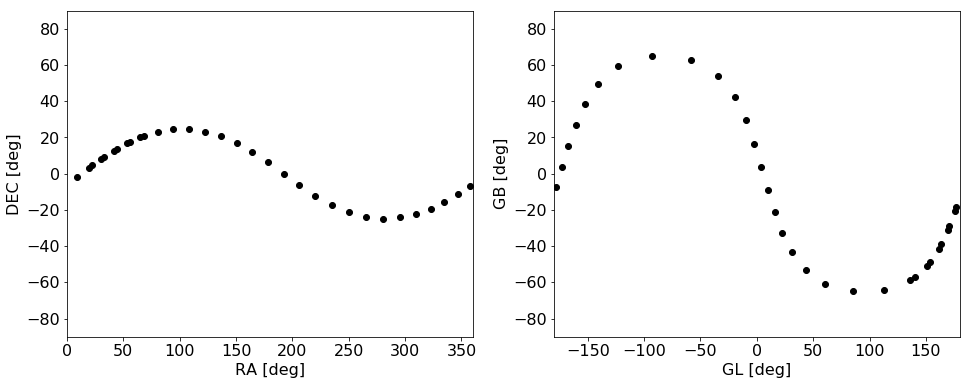

In [1480]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(ra_moon,dec_moon,'ko')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.ylim(-90,90)
plt.xlim(0,360)

plt.subplot(122)
plt.plot(gl_moon,gb_moon,'ko')
plt.xlabel('GL [deg]')
plt.ylabel('GB [deg]')
plt.ylim(-90,90)
plt.xlim(-180,180)

<h3>or fancy aitoff projection plot:<br>
    (need rad units rather than deg to plot in this projection)</h3>

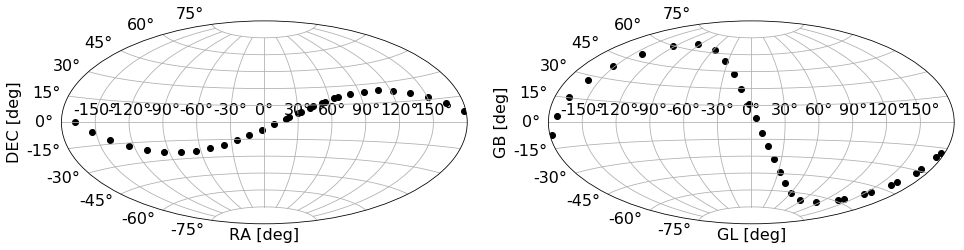

In [1481]:
deg2rad = np.pi/180

plt.figure(figsize=(16,6))

plt.subplot(121,projection='aitoff')
ra_moon_tmp = np.copy(ra_moon)
ra_moon_tmp[ra_moon_tmp>180] -= 360
plt.scatter(ra_moon_tmp*deg2rad,dec_moon*deg2rad,marker='o',c='k')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid()

plt.subplot(122,projection='aitoff')
plt.scatter(gl_moon*deg2rad,gb_moon*deg2rad,marker='o',c='k')
plt.xlabel('GL [deg]')
plt.ylabel('GB [deg]')
plt.grid()

<h3>Declination within this month</h3>

Text(0, 0.5, 'DEC [deg]')

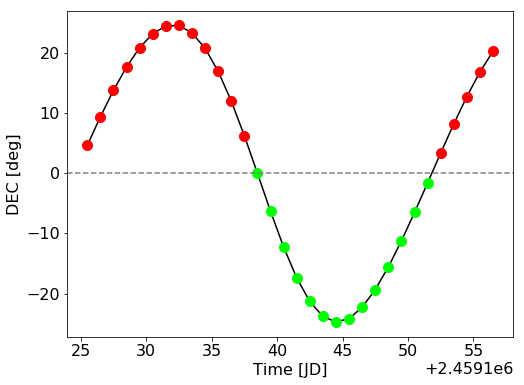

In [1482]:
plt.plot(jd_moon,dec_moon,'ko-')
pos = dec_moon > 0
neg = dec_moon < 0
plt.plot(jd_moon[pos],dec_moon[pos],'o',color='red',markersize=10)
plt.plot(jd_moon[neg],dec_moon[neg],'o',color='lime',markersize=10)
plt.axhline(0,color='gray',linestyle='--')
plt.xlabel('Time [JD]')
plt.ylabel('DEC [deg]')

<h3>angular diameter of the Moon during this month:</h3>

In [1483]:
angdiam_moon = moon_eph_df['ang_width'].values

Text(0, 0.5, 'Apparent size [deg]')

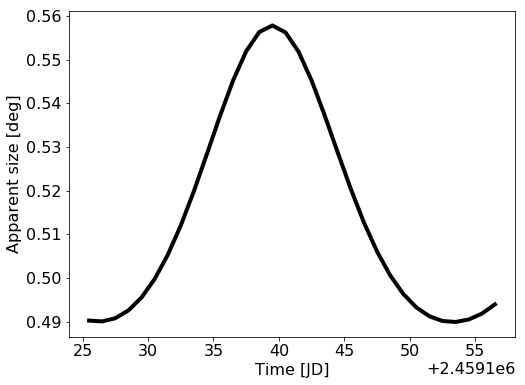

In [1484]:
plt.plot(jd_moon,angdiam_moon/3600,'k-',linewidth=4)
plt.xlabel('Time [JD]')
plt.ylabel('Apparent size [deg]')

<h3>other things ...</h3>

In [1485]:
np.mean(angdiam_moon)/3600

0.5146348003472223

In [1486]:
np.std(angdiam_moon)/3600

0.0241950840918996

In [1487]:
np.median(angdiam_moon)/3600


0.5056283333333333

<h1>1) Now get the same time, but observed from the INTEGRAL satellite.<br>
    2) Find another object, e.g. Ceres (id=1) in the Main Asteroid Belt, and check the difference between an Earth observation and INTEGRAL.<br>
    3) Plot (the information that you think will be useful and needed for) Ceres for the time scale of 5 years (weekly data points).<br>
    4) If you have Ceres, how about the rest of the asteroid belt?</h1>

<h1>Moon as seen from INTEGRAL:</h1>

In [1488]:
obj2 = Horizons(id='301',id_type='majorbody', # the Moon
               location='500@-198',               # Earth centre
               epochs={'start':'2020-10-03', # dictionary that includes the times we want
                       'stop':'2020-11-03',  # NB: exactly the same as I used for my example
                       'step':'1h'})

In [1489]:
moon_eph2 = obj2.ephemerides()

In [1490]:
# might see a few warnings, shouldn't matter
moon_eph_df2 = moon_eph2.to_pandas()

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'IB_elong' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'IB_illum' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1491]:
gl_moon2 = moon_eph_df2['GlxLon'].values
gl_moon2[gl_moon2>180] -= 360
gb_moon2 = moon_eph_df2['GlxLat'].values
jd_moon2 = moon_eph_df2['datetime_jd'].values
ra_moon2 = moon_eph_df2['RA'].values
dec_moon2 = moon_eph_df2['DEC'].values

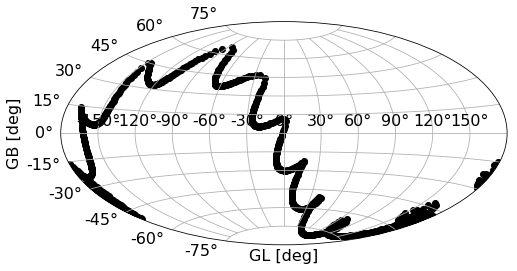

In [1492]:
plt.subplot(projection='aitoff')
plt.scatter(gl_moon2*deg2rad,gb_moon2*deg2rad,marker='o',c='k')
plt.xlabel('GL [deg]')
plt.ylabel('GB [deg]')
plt.grid()

<h1>Comparison Ceres and Vesta:</h1>

In [1493]:
obj3 = Horizons(id='Ceres',id_type='majorbody', #
               location='500@-198',               # Earth centre
               epochs={'start':'2019-10-03', # dictionary that includes the times we want
                       'stop':'2020-10-02',  # NB: exactly the same as I used for my example
                       'step':'1d'})

In [1494]:
obj3.ephemerides()

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,IB_elong,IB_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str17,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,int64,int64,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
1 Ceres (A801 AA),2019-Oct-03 00:00,2458759.5,3.4,0.12,,,252.74908,-24.64834,252.74643,-24.64851,45.22148,-6.88396,--,--,--,--,231015.709,-75473.96,115.513,--,999,--,9.15,6.997,97.41226,0.011,234579.7,*,0.42447,248.391728,6.916941,229.969621,4.115801,277.73,0.07,14.3551,0.195,272.8828,-2.3321,2.859583304394,1.2012545,3.13198817174049,22.7954548,26.04795134,17.3259375,36.7781917,65.161,/L,18.5165,--,--,96.3192,97.73,288.144,3.18458,Oph,69.182313,254.3497622,-2.1417379,291.42763,66.76033,356.558089,12.454303,--,0.006142,0.0,0.0,0.00011,1e-05,75.268,0.0,0.0,0.0146,0.0,0.0,0.0,0.0,118.9486,--,18.5142,263.6152,-2.2659
1 Ceres (A801 AA),2019-Oct-04 00:00,2458760.5,3.4,0.12,,,253.09568,-24.70898,253.0929,-24.7086,46.02406,-11.2959,--,--,--,--,228825.905,-74279.63,115.49,--,999,--,9.155,6.994,97.44633,0.0108,232121.0,*,0.422697,120.150876,6.894795,101.850433,4.123756,277.64,0.07,14.2436,0.194,273.0797,-2.368,2.860276381399,1.1989912,3.14512440642574,21.8710547,26.15720208,17.3215898,37.1476599,64.4781,/L,18.3934,--,--,97.1253,97.642,288.001,3.14895,Oph,69.182312,254.6696794,-2.1646124,291.42763,66.76033,356.707361,12.168896,--,0.006123,0.0,0.0,0.00011,1e-05,75.417,0.0,0.0,0.0146,0.0,0.0,0.0,0.0,119.1482,--,18.3908,263.8737,-2.2956
1 Ceres (A801 AA),2019-Oct-05 00:00,2458761.5,3.4,0.12,,,253.43166,-24.77431,253.4289,-24.77425,45.74325,-8.5647,--,--,--,--,226728.228,-73087.31,115.463,--,999,--,9.161,6.991,97.47771,0.0106,229750.5,*,0.420996,351.92076,6.881458,333.733705,4.131658,277.54,0.07,14.1352,0.193,273.2765,-2.4038,2.860968149137,1.1967143,3.15783036477902,22.1306456,26.26287431,17.3172509,36.9633391,63.8196,/L,18.279,--,--,97.8982,97.538,287.865,3.1214,Oph,69.182311,254.9805732,-2.1948452,291.42763,66.76033,356.84505,11.887304,--,0.00841,0.0,0.0,0.00011,1e-05,75.562,0.0,0.0,0.0145,0.0,0.0,0.0,0.0,119.3478,--,18.2765,264.1275,-2.3285
1 Ceres (A801 AA),2019-Oct-06 00:00,2458762.5,3.4,0.12,,,253.76993,-24.82109,253.76696,-24.82154,47.15435,-4.32621,--,--,--,--,224514.412,-71995.11,115.435,--,999,--,9.166,6.988,97.50877,0.0104,227332.6,*,0.419277,223.691935,6.847319,205.615733,4.139505,277.49,0.07,14.0253,0.193,273.4732,-2.4396,2.861658597036,1.1944237,3.1707795724725

In [1495]:
obj4 = Horizons(id='Ceres',id_type='majorbody', #
               location='500',               # Earth centre
               epochs={'start':'1950-10-03', # dictionary that includes the times we want
                       'stop':'2020-10-02',  # NB: exactly the same as I used for my example
                       'step':'10d'})

In [1496]:
ceres_eph = obj4.ephemerides()
ceres_eph_df = ceres_eph.to_pandas()
gl_ceres = ceres_eph_df['GlxLon'].values
gl_ceres[gl_ceres>180] -= 360
gb_ceres = ceres_eph_df['GlxLat'].values
jd_ceres = ceres_eph_df['datetime_jd'].values
ra_ceres = ceres_eph_df['RA'].values
dec_ceres = ceres_eph_df['DEC'].values
angdiam_ceres = ceres_eph_df['ang_width'].values

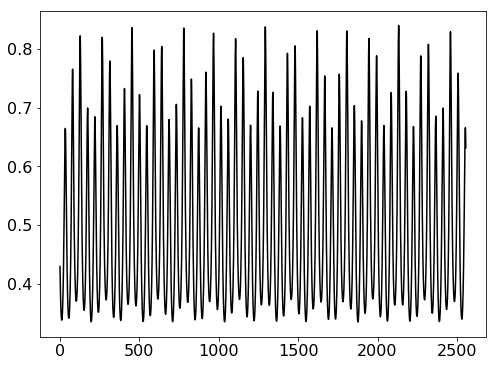

In [1497]:
plt.plot(angdiam_ceres)

In [1498]:
obj5 = Horizons(id='Vesta',id_type='majorbody', #
               location='500',               # Earth centre
               epochs={'start':'1950-10-03', # dictionary that includes the times we want
                       'stop':'2020-10-02',  # NB: exactly the same as I used for my example
                       'step':'10d'})

In [1499]:
vesta_eph = obj5.ephemerides()
vesta_eph_df = vesta_eph.to_pandas()
gl_vesta = vesta_eph_df['GlxLon'].values
gl_vesta[gl_vesta>180] -= 360
gb_vesta = vesta_eph_df['GlxLat'].values
jd_vesta = vesta_eph_df['datetime_jd'].values
ra_vesta = vesta_eph_df['RA'].values
dec_vesta = vesta_eph_df['DEC'].values
angdiam_vesta = vesta_eph_df['ang_width'].values

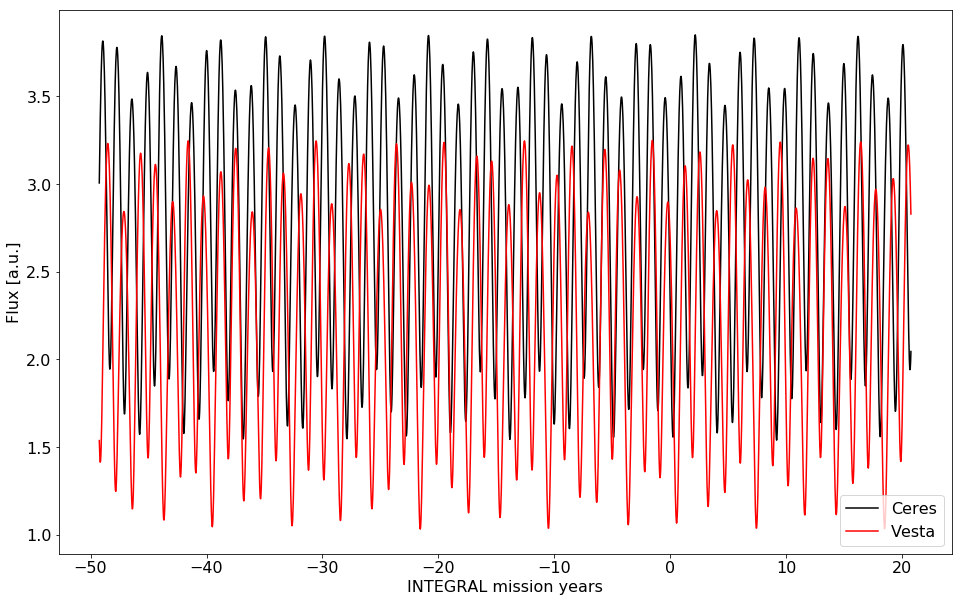

In [1501]:
plt.figure(figsize=(16,10))
plt.plot((jd_ceres-2451544.5)/365.25,(940/np.tan(angdiam_ceres/3600*deg2rad/2)/1.5e8/2)**(1),label='Ceres')
plt.plot((jd_vesta-2451544.5)/365.25,(525/np.tan(angdiam_vesta/3600*deg2rad/2)/1.5e8/2)**(1),label='Vesta')
plt.ylabel('Flux [a.u.]')
plt.xlabel('INTEGRAL mission years')
plt.legend()

<h1>Excursion: Fourier transformation</h1>

Text(0, 0.5, 'FFT power-spectrum')

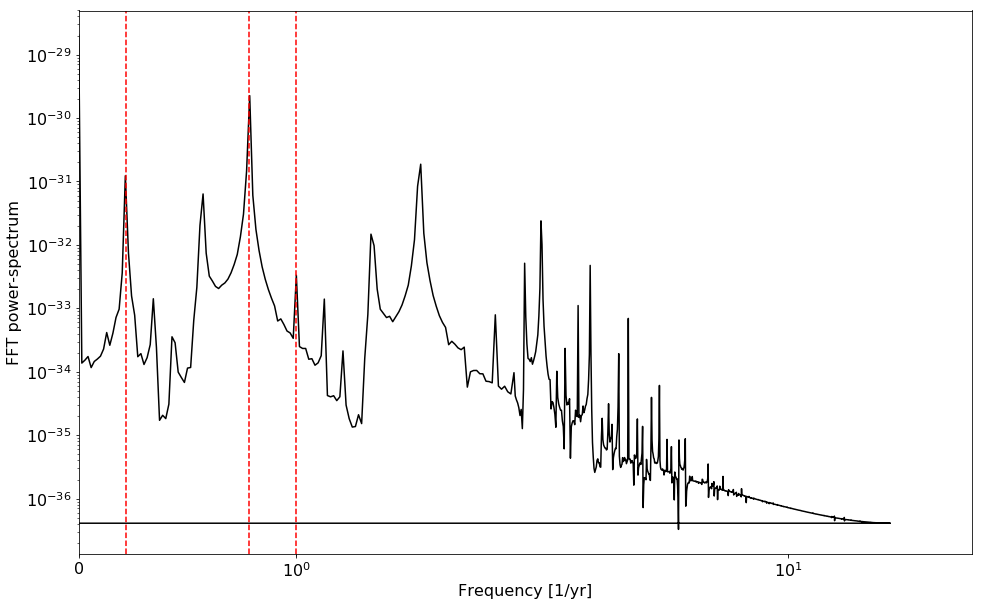

In [202]:
t = (jd_ceres-2451544.5)/365.2
sp = np.abs(np.fft.fft((940/np.tan(angdiam_ceres/3600*deg2rad/2))**(-2)))**2
freq = np.fft.fftfreq(t.shape[-1],d=np.diff(t[0:2]))
plt.figure(figsize=(16,10))
plt.semilogy(freq, sp)
plt.xscale('symlog')
plt.xlim(0,)
plt.axvline(1,color='red',linestyle='--')
plt.axvline(1/4.61,color='red',linestyle='--')
plt.axvline(1/1.278,color='red',linestyle='--')
#plt.axvline(365/28,color='red',linestyle='--')
plt.xlabel('Frequency [1/yr]')
plt.ylabel('FFT power-spectrum')

<h3>And a sine curve</h3>

In [192]:
t = np.arange(1000)/10
sp = np.abs(np.fft.fft(np.sin(t)))**2

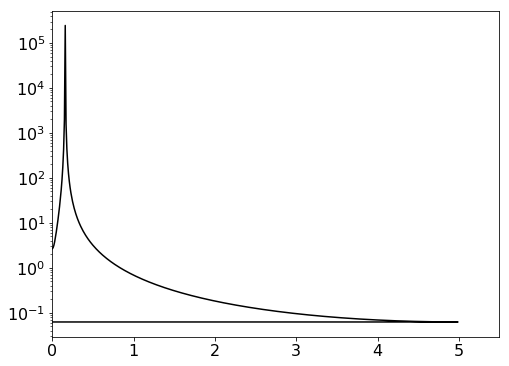

In [193]:
freq = np.fft.fftfreq(t.shape[-1],d=0.1)

plt.plot(freq, sp)
plt.xlim(0,)
plt.yscale('log')

In [194]:
1/freq[np.argmax(sp.real)]

6.25

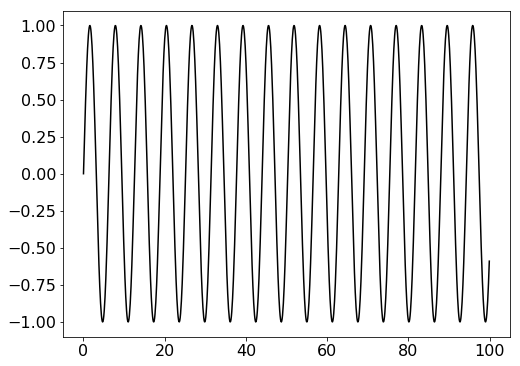

In [195]:
plt.plot(t,np.sin(t))

<h1>Moving Earth wrt fixed point in sky:<br><br>
    Assumption: two concentric circles ...:</h1>

In [1502]:
alpha = 2*np.pi*t

In [1505]:
R_E = 1.      # distance Earth
R_P = 2.77    # distance centre of MBA torus  
dist = np.sqrt(R_E**2 + R_P**2 - 2*R_P*R_E*np.cos(alpha))   # distance function with time

Text(0, 0.5, 'Distance [AU]')

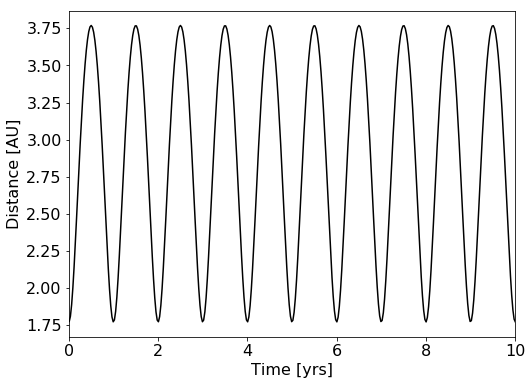

In [1506]:
plt.plot(t,dist)
plt.xlim(0,10)
plt.xlabel('Time [yrs]')
plt.ylabel('Distance [AU]')

In [1507]:
dist.min(),dist.max()

(1.7700092647377852, 3.77)

Text(0, 0.5, 'Maximum flux variation [a.u.]')

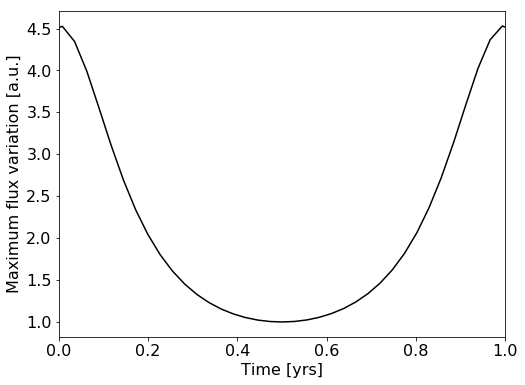

In [1509]:
plt.plot(t,1/(4*np.pi*dist**2)/(1/(4*np.pi*dist**2)).min())
plt.xlim(0,1)
plt.xlabel('Time [yrs]')
plt.ylabel('Maximum flux variation [a.u.]')

<h3>Many points ...</h3>

In [254]:
R_E = 1.
R_P = 2.77
N = 10
delta_alpha_arr = np.linspace(0,2*np.pi*(1-1/N),N)
dist_arr = np.zeros((len(dist),len(delta_alpha_arr)))
for i in range(len(delta_alpha_arr)):
    dist_arr[:,i] = np.sqrt(R_E**2 + R_P**2 - 2*R_P*R_E*np.cos(alpha+delta_alpha_arr[i]))

(0, 10)

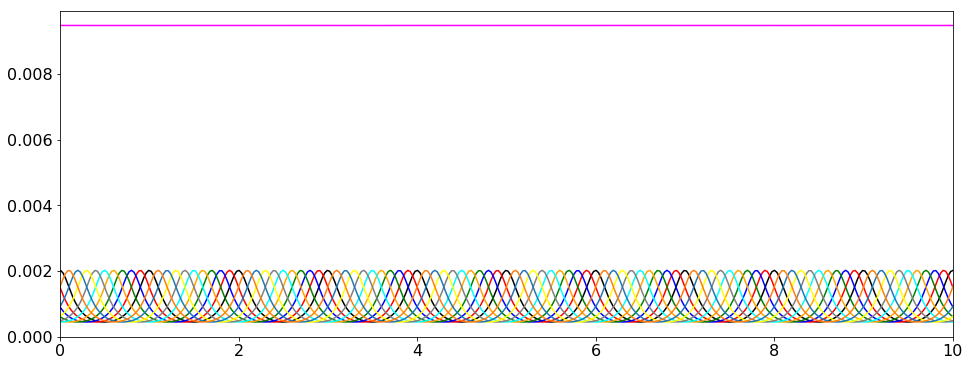

In [256]:
plt.figure(figsize=(16,6))
for i in range(len(delta_alpha_arr)):
    plt.plot(t,(4*np.pi*dist_arr[:,i])**(-2))
plt.plot(t,np.sum((4*np.pi*dist_arr[:,:])**(-2),axis=1),color='magenta')
plt.xlim(0,10)
#plt.yscale('log')

In [1160]:
from IPython.display import Image

<h1>Line-of-sight integration:</h1>

<h1>$F(l,b;\vec{\phi}) = \frac{1}{4\pi} \int_0^{+\infty}\,ds \rho(x(s),y(s),z(s);\vec{\phi})$</h1>

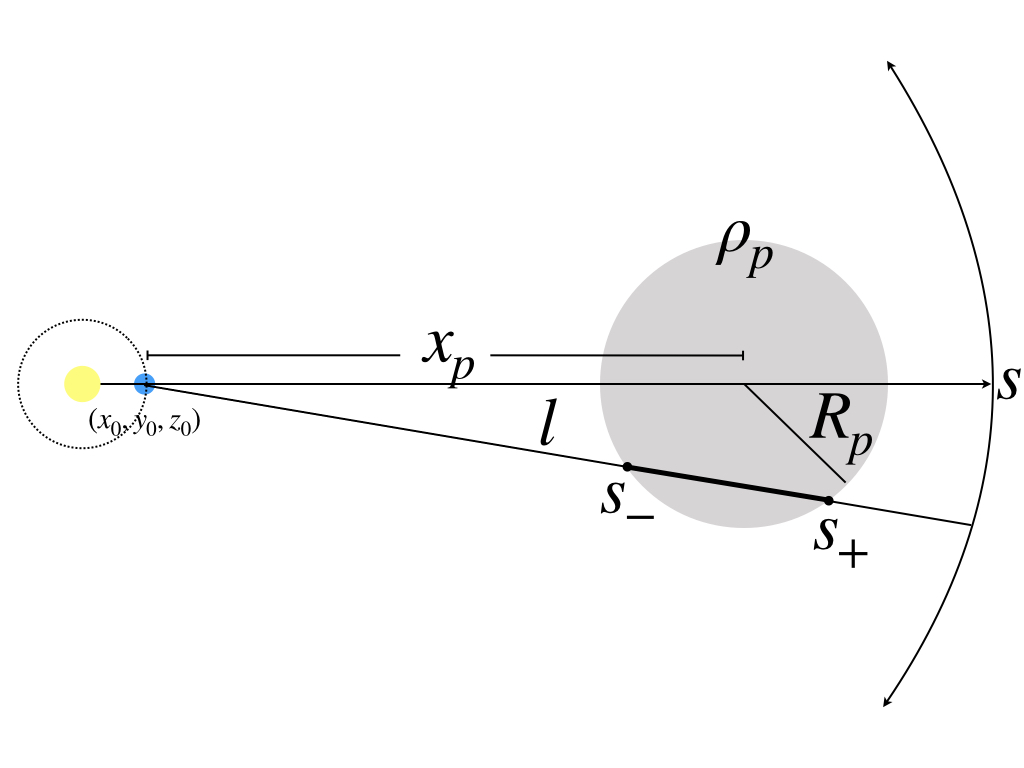

In [1167]:
with open('los_sphere.jpg','rb') as f:
    display(Image(data=f.read(), format='png',width=800),)

<h1>Homogeneously filled sphere at $(x_p,y_p,z_p)$ with radius $R_p$ and "density" $\rho_p$:<br>
    $\Rightarrow \rho(x,y,z) = \rho_p~\forall (x-x_p)^2 + (y-y_p)^2 + (z-z_p)^2 \leq R_p^2$ and $0~else$</h1>

<h1>Integral from $0$ to $+\infty$ is thus converted to finding the intersection of each line of sight with the sphere.<br><br>
    The line of sight is defined by starting a vector from Earth to infinity:<br>
    $x(s) = x_0 + s\cos(\phi)\cos(\theta)$<br>
    $y(s) = y_0 + s\sin(\phi)\cos(\theta)$<br>
    $z(s) = z_0 + s\sin(\theta)$</h1>

<h1>This is analytically(!) solvabale and gives:<br>
    $s_{\pm} = -p \pm \sqrt{p^2 + R_p^2 - (\Delta r)^2}$ with<br>
    $p(\phi,\theta) = \Delta x \cos(\phi)\cos(\theta) + \Delta y \sin(\phi)\cos(\theta) + \Delta z \sin(\theta)$<br>
    $\Delta x = x_0-x_p$, $\Delta y = y_0-y_p$, $\Delta z = z_0-z_p$, and $\Delta r = \sqrt{(\Delta x)^2 + (\Delta y)^2 + (\Delta z)^2 }$</h1>

<h1>This the solution of the integral is:<br>
    $F(\phi,\theta) = \frac{\rho_p}{4\pi}2\sqrt{p^2 + R_p^2 - (\Delta r)^2}$<br>
    with a little exception...</h1>

<h1>In python:</h1>

In [1520]:
def los_sphere(phi,theta,x0,y0,z0,rhop,xp,yp,zp,Rp):
    Delta_x = x0-xp
    Delta_y = y0-yp
    Delta_z = z0-zp
    Delta_r = np.sqrt(Delta_x**2 + Delta_y**2 + Delta_z**2)
    p = Delta_x*np.cos(theta)*np.cos(phi) + Delta_y*np.cos(theta)*np.sin(phi) + Delta_z*np.sin(theta)
    k0 = np.sqrt(p**2 + Rp**2 - Delta_r**2)
    
    sp = -p+k0
    sm = -p-k0
    
    val = rhop/(4*np.pi)*2*k0
    
    # other exceptions?
    
    #print(idx)
    idx = np.where((sp < 0) | (sm < 0))
    
    val[idx[0],idx[1]] = 0
    val[np.isnan(val)] = 0
    
    return val

<h1>Defining the sky:</h1>

In [1511]:
theta_arrg = np.linspace(-np.pi/2,np.pi/2,181)
phi_arrg = np.linspace(-np.pi,np.pi,361)

theta_arr = (theta_arrg[0:-1]+theta_arrg[1:])/2
phi_arr = (phi_arrg[0:-1]+phi_arrg[1:])/2

PHI_ARRg,THETA_ARRg = np.meshgrid(phi_arrg,theta_arrg)
PHI_ARR,THETA_ARR = np.meshgrid(phi_arr,theta_arr)

binsize = np.diff(theta_arr)[0]

dOmega = (np.sin(THETA_ARR+binsize/2)-np.sin(THETA_ARR-binsize/2))*binsize

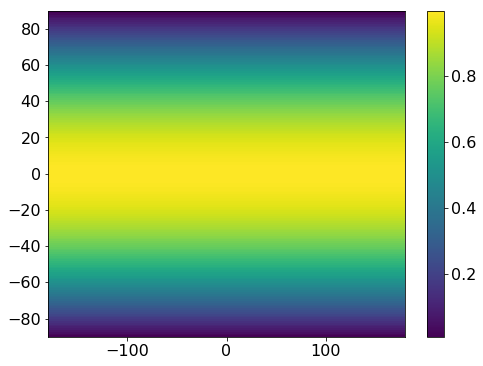

In [1514]:
plt.pcolormesh(PHI_ARRg/deg2rad,THETA_ARRg/deg2rad,dOmega/(deg2rad**2))
plt.colorbar()

In [1515]:
# cross check
np.sum(dOmega),4*np.pi

(12.566370614359531, 12.566370614359172)

In [1521]:
sphere1 = los_sphere(PHI_ARR,THETA_ARR,
                     1,0,0, # Earth
                     1,     # rho
                     10,0,0,# sphere
                     1)     # radius

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


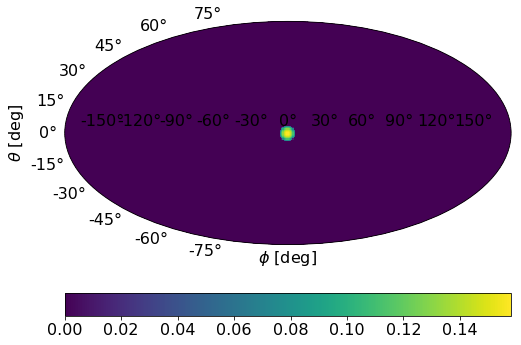

In [1522]:
plt.subplot(projection='aitoff')
plt.pcolormesh(PHI_ARRg,THETA_ARRg,sphere1)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\theta$ [deg]')
plt.colorbar(orientation='horizontal')

In [1523]:
sphere2 = los_sphere(PHI_ARR,THETA_ARR,1,0,0,1,10/np.sqrt(2),10/np.sqrt(2),0,1)

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


Text(0, 0.5, '$\\theta$ [deg]')

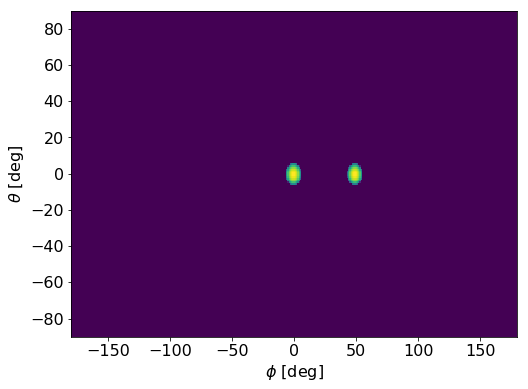

In [1524]:
plt.pcolormesh(PHI_ARRg/deg2rad,THETA_ARRg/deg2rad,sphere1+sphere2)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\theta$ [deg]')

In [1525]:
sphere3 = los_sphere(PHI_ARR,THETA_ARR,1,0,0,1,0,10,10,10)

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


Text(0, 0.5, '$\\theta$ [deg]')

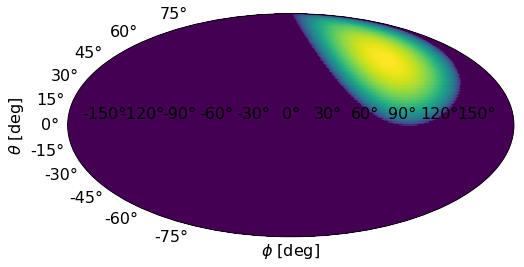

In [1526]:
plt.subplot(projection='mollweide')
plt.pcolormesh(PHI_ARRg,THETA_ARRg,sphere3)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\theta$ [deg]')

<h1>LOS of a homogeneously filled torus with large radius $R_T$ and small (tube) radius $R_t$:<br>
    Torus: $\left(\sqrt{(x-x_T)^2 + (y-y_T)^2} - R_T^2\right)^2 + (z-z_T)^2 - R_t^2 = 0$</h1>

In [1527]:
def los_torus(phi,theta,x0,y0,z0,rhoT,xT,yT,zT,RT,Rt):
    Delta_x = x0-xT
    Delta_y = y0-yT
    Delta_z = z0-zT
    Delta_r = np.sqrt(Delta_x**2 + Delta_y**2 + Delta_z**2)
    p = Delta_x*np.cos(theta)*np.cos(phi) + Delta_y*np.cos(theta)*np.sin(phi) + Delta_z*np.sin(theta)
    q = np.cos(theta)*(Delta_x*np.cos(phi)+Delta_y*np.sin(phi))
    xi = np.sqrt(Delta_r**2 + RT**2 - Rt**2)
    nu = (4*RT**2*Delta_x**2 + 4*RT**2*Delta_y**2)**(0.25)
    A = 1.
    B = 4*p
    C = 4*p**2 + 2*xi**2 - 4*RT**2*np.cos(theta)**2
    D = 4*p*xi**2 - 8*RT**2*q
    E = xi**4 - nu**4
    
    # can't use vectorisation of np.roots() is used
    # are there analytic solutions to arbitrary quartic equations?
    x1,x2,x3,x4 = np.roots([A,B,C,D,E])

    delta = np.arctan2(y0,x0)

    # solution only valid if observer sits inside torus but on in tube
    return np.max([(x1-x2).real,(x3-x4).real])

In [1544]:
from tqdm.autonotebook import tqdm as tqdm

In [1542]:
# need to loop over values here (see above):
torus1 = np.zeros(PHI_ARR.shape)
for i in tqdm(range(len(theta_arr))):
    for j in range(len(phi_arr)):
        torus1[i,j] = los_torus(PHI_ARR[i,j],THETA_ARR[i,j],
                                1,0,0, # Earth
                                1,     # rho
                                0,0,0, # position of torus (not all values valid with definition above)
                                2.8,   # large radius
                                0.5)   # small radius

Text(0, 0.5, '$\\theta$ [deg]')

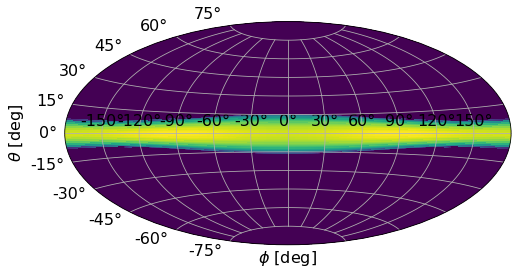

In [1543]:
plt.subplot(projection='aitoff')
plt.pcolormesh(PHI_ARRg,THETA_ARRg,torus1)
plt.grid()
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\theta$ [deg]')

<h1>Movie of Earth around the Sun, seeing the MBA torus:</h1>

In [1545]:
# 52 points in one year
N = 52
omega = np.linspace(0,2*np.pi*(1-1/N),N)

xsol = np.cos(omega) 
ysol = np.sin(omega)

In [1546]:
tmp = np.zeros((len(xsol),PHI_ARR.shape[0],PHI_ARR.shape[1]),dtype=complex)

# loop over all positions and do los integration
# might take a few minutes
for p in tqdm(range(len(xsol))):
    for i in range(len(theta_arr)):
        for j in range(len(phi_arr)):
            tmp[p,i,j] = los_torus(PHI_ARR[i,j],THETA_ARR[i,j],xsol[p],ysol[p],0,1,0,0,0,2.8,0.5)

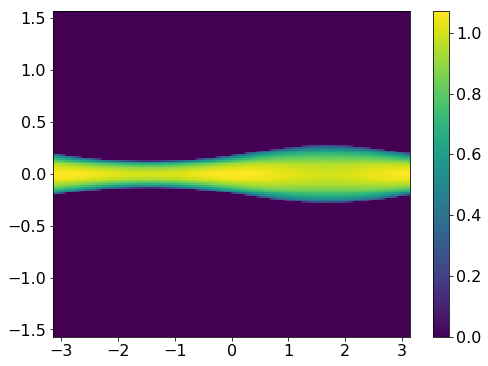

In [1547]:
# example that it worked
plt.pcolormesh(PHI_ARRg,THETA_ARRg,tmp[14,:,:].real)
plt.colorbar()

<h1>Integrating a map (integration of a function on a sphere):<br>

$F = \int\,d\Omega F(\phi,\theta) = \int_{-\pi}^{+\pi}\,d\phi\int_{-\pi/2}^{+\pi/2}\,d\theta \cos(\theta) F(\phi,\theta)$</h1>

In [1548]:
# from first torus:
np.sum(torus1*dOmega)

2.0270172443067445

<h1>This means for the parameters $(x_0,y_0,z_0) = (1,0,0)\,\mathrm{AU}$, $\rho = 1\,\mathrm{s^{-1}\,AU^{-3}}$ (units invented, but should be per unit time and unit volume), $(x_T,y_T,z_T) = (0,0,0)\,\mathrm{AU}$ (centred on the position of the Sun, $R_T = 2.8\,\mathrm{AU}$, and $R_t = 0.5\,\mathrm{AU}$, the total flux of the entire sky received at Earth is $2.027\,\mathrm{photons\,s^{-1}\,AU^{-2}}$.<br>
    Per AU-squared is not necessarily a useful unit for us, so we'd convert that into $\mathrm{photons\,s^{-1}\,cm^{-2}}$.</h1>

<h1>What we are interested in the end is the luminosity ("power", energy per time, or photons per time) that comes from this torus, so we have to integrate over the distance sphere as well (remember for a point source it was $L = \frac{F}{4 \pi d^2}$ with $d$ as the distance):<br>
    $L = \int\,d\Omega\int_0^{+\infty}\,ds\,s^2\,\rho(x(s,\phi,\theta),y(s,\phi,\theta),z(s,\phi,\theta))$</h1>

<h1>You see that this is even for the homogeneous sphere case not analytically solvable any more (pretty sure).<br>
    The integral over $s$ however is, so we can do it in two steps:<br>
    $L = \frac{\rho_p}{3}\int\,d\Omega\,(s_+^3 - s_-^3)$</h1>

<h3>(For the torus, this would be very similar, maybe you can make a function for yourself.)</h3>

<h1>Sphere example continued:</h1>

In [1557]:
sphere1 = los_sphere(PHI_ARR,THETA_ARR,
                     1,0,0, # Earth
                     1,     # rho
                     10,0,0,# sphere
                     1)     # radius

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [1558]:
def lumi_sphere(phi,theta,x0,y0,z0,rhop,xp,yp,zp,Rp,dOmega):
    Delta_x = x0-xp
    Delta_y = y0-yp
    Delta_z = z0-zp
    Delta_r = np.sqrt(Delta_x**2 + Delta_y**2 + Delta_z**2)
    p = Delta_x*np.cos(theta)*np.cos(phi) + Delta_y*np.cos(theta)*np.sin(phi) + Delta_z*np.sin(theta)
    k0 = np.sqrt(p**2 + Rp**2 - Delta_r**2)
    
    sp = -p+k0
    sm = -p-k0
    
    val = rhop/3*(sp**3 - sm**3)

    # exceptions
    idx = np.where((sp < 0) | (sm < 0))
    
    val[idx[0],idx[1]] = 0
    val[np.isnan(val)] = 0
    
    lumi = np.sum(val*dOmega)
    
    return lumi

<h3>Flux of sphere1 (integrating over the sky, as seen "from Earth"):</h3>

In [1560]:
np.sum(sphere1*dOmega)

0.004091873452014718

<h3>Intrinsic(!) luminosity of the sphere:</h3>

In [1561]:
lumi_sphere(PHI_ARR,THETA_ARR,
                     1,0,0, # Earth
                     1,     # rho
                     10,0,0,# sphere
                     1,     # radius 
                     dOmega)

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


4.155074001619979

<h1>In summary this means, with the given parameters, a measured flux of $0.00409$ would correspond to an intrinsic brightness of $4.155$.<br>
    (I ignored the units here, but they must correspond to each other of course.)</h3>

<h1>Torus example continued:</h1>

<h3>Minimum and maximum differential flux along the torus:</h3>

In [1562]:
np.sum(tmp[0,:,:].real*dOmega,axis=0).min(),np.sum(tmp[0,:,:].real*dOmega,axis=0).max()

(0.0036055472000722146, 0.007617952338233258)

<h3>Gives a variation of about a factor of $2$!</h3>

<h1>Making the animation:<br>
    We first calculated all images and stored them in the array tmp. Then we "plot" them and store the plot objects in a list. These are read in sequence and an animation is made with specific time intervals, etc.:</h1>

In [1563]:
from matplotlib import animation

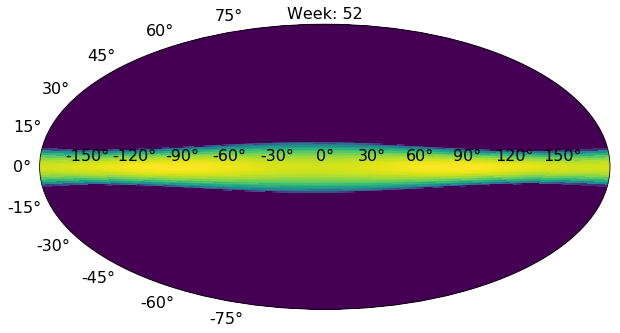

In [1564]:
fig, ax = plt.subplots(figsize=(10.24,7.68),subplot_kw={'projection':'aitoff'},nrows=1,ncols=1)
#ax[0,0].set_xticks([])
#ax[0,0].set_yticks([])
#a ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
for i in tqdm(range(len(xsol))):
    ttl = plt.text(0.5, 1.01, r'Week: '+str('%i' % (i+1)), horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    #ttl_na22 = plt.text(0.5, 1.01, r'$^{22}$Na; Year: '+str('%.2f' % (i/365*7)), horizontalalignment='center', verticalalignment='bottom', transform=ax[0,1].transAxes)
    ims.append([ax.pcolormesh(PHI_ARRg,THETA_ARRg,tmp[i,:,:].real),
                ttl])
                #ax[1,0].plot(t_arr[0:i+1][-1],tot_flux_be7[-1],'o'),
                #ttl_be7,ttl_na22,ttl_SPI,ttl_COSI])

    
#cbar = plt.colorbar()
#cbar.set_clim(0, 0.00001)
#plt.xticks([])
#plt.yticks([])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=0)
#cbar = plt.colorbar()
#cbar.set_clim(0, 0.8)

ani.save('MBA_blob.mp4')

#plt.show()

<h1>And displaying the movie in the notebook:</h1>

In [1571]:
from IPython.display import Video

In [1572]:
Video("MBA_blob.mp4",)

<h3>playing around with quartic functions...</h3>

In [1567]:
np.complex(1)

(1+0j)

In [1568]:
x2 = np.linspace(-10,10,1000)
y2 = 1.0*x2**4 + 4.0*x2**3 - 26.5*x2**2 - 61.0*x2 + 216.5625

(-7, 5)

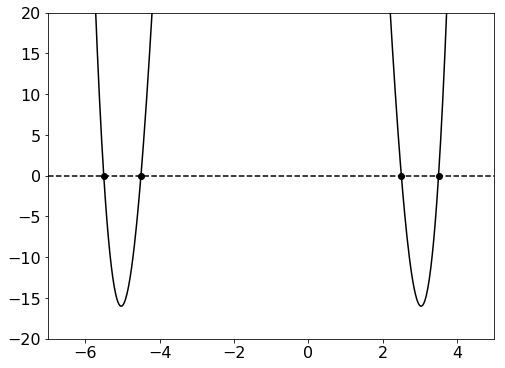

In [1569]:
plt.plot(x2,y2)
plt.axhline(0,linestyle='--')
plt.plot(-4.5,0,'ko')
plt.plot(-5.5,0,'ko')
plt.plot(2.5,0,'ko')
plt.plot(3.5,0,'ko')
#plt.yscale('symlog')
plt.ylim(-20,20)
plt.xlim(-7,5)